In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, Hamiltonian, IsingHamiltonian

In [11]:
#Initializing starting values

visible_size = 2
hidden = 2
H = IsingHamiltonian(n=visible_size)

steps = 1000

seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)

energy_list = []
error_list = []
gstate_list =[]

In [12]:

rbm = RBM(visible_size=visible_size, hidden_size=hidden, hamiltonian=H, walker_steps=0)

eig, states = np.linalg.eigh(H)
print(f"Eig: {eig},state: \n{states}")
E_truth = np.min(eig)
e_truth_index = np.argmin(eig)
print(f"Eig index: {e_truth_index}")
gstate = states[:, e_truth_index]
print(f"g state: {gstate}")


Eig: [-0.21967189 -0.21967189  0.21967189  0.21967189],state: 
[[-0.70710678 -0.          0.         -0.70710678]
 [ 0.         -0.70710678  0.70710678  0.        ]
 [ 0.         -0.70710678 -0.70710678  0.        ]
 [-0.70710678  0.          0.          0.70710678]]
Eig index: 0
g state: [-0.70710678  0.          0.         -0.70710678]


In [13]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")

print(f"RBM state error: {np.real(gstate @ rbm.wave_function())}")

RBM wave function: 
[[0.06613029-0.27809061j]
 [0.0069272 -0.87615042j]
 [0.01166517-0.15218916j]
 [0.095365  -0.34382081j]]
True ground state: 
[-0.70710678  0.          0.         -0.70710678]
RBM state error: [-0.11419442]


In [14]:
energy_list = rbm.train(iterations=steps, lr=0.01, print_energy=False)

func:train args:[(<src.nqs.RBM object at 0x00000149633B7850>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 0.5588040351867676 sec


<IPython.core.display.Javascript object>


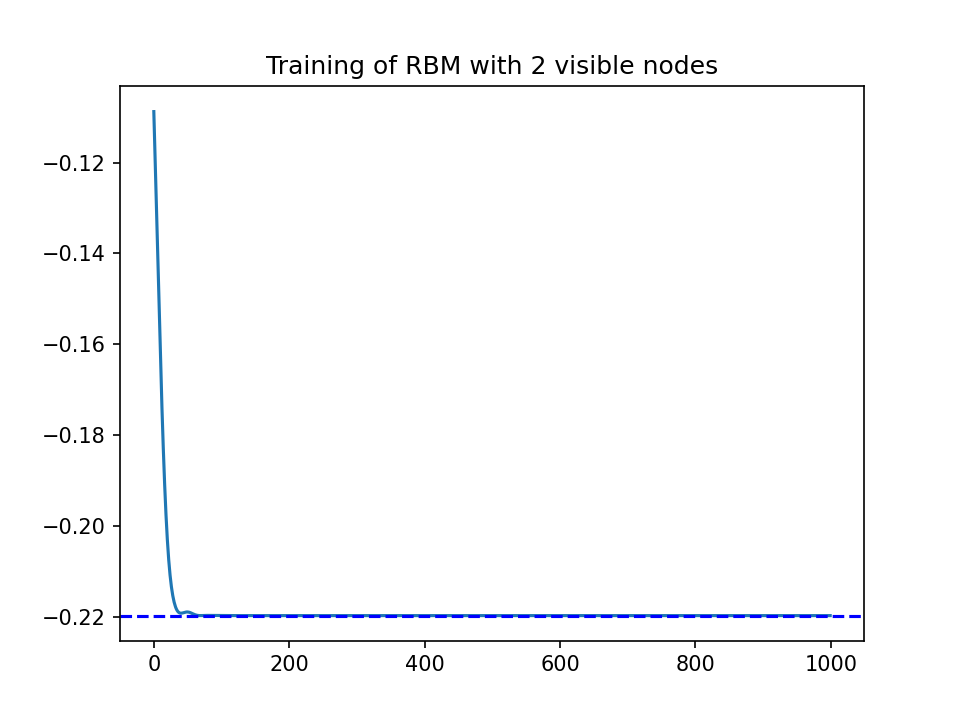

Text(0.5, 1.0, 'Training of RBM with 2 visible nodes')

In [15]:
# plt.ioff() # uncomment to stop plotting in notebook

plt.plot(energy_list)

plt.axhline(y=E_truth, color='b', linestyle='--')
plt.title(f"Training of RBM with {visible_size} visible nodes")


In [17]:
print(f"Ground state energy found: {energy_list[-1]}")
print(f"True GS energy: {E_truth}")
print(f"Error: {np.abs(E_truth-energy_list[-1])}")

Ground state energy found: -0.21967188783751201
True GS energy: -0.21967188783751193
Error: 8.326672684688674e-17


In [18]:
print(f"RBM wave function: \n{rbm.wave_function()}")
print(f"True ground state: \n{gstate}")

print(f"RBM state error: {np.abs(gstate.T.conj() @ rbm.wave_function())}")
print(gstate.shape)

RBM wave function: 
[[0.15691903-0.43958441j]
 [0.09689548-0.52225782j]
 [0.09689548-0.52225782j]
 [0.15691903-0.43958441j]]
True ground state: 
[-0.70710678  0.          0.         -0.70710678]
RBM state error: [0.66008793]
(4,)
